🎯 Desafio dia 94 — Consumo de Energia Residencial

📂 Dataset: desafio_dia_94_consumo_energia.csv

🔍 Contexto: Uma companhia de energia elétrica monitora o consumo diário de eletricidade em diferentes bairros da cidade. Com base nesses dados, deseja identificar padrões de consumo, outliers e prever consumo futuro básico.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

- Preencha os valores ausentes em consumo_kwh com a média por residência (id_residencia).

📊 Análise geral

- Qual é o consumo médio diário total da cidade?

- Qual bairro apresenta o maior consumo médio por residência?

📈 Visualização de dados

- Crie um gráfico de linha mostrando a média diária de consumo_kwh em toda a cidade ao longo do tempo.

🤖 Machine Learning - Regressão Simples

- Selecione os dados de uma residência aleatória.

- Modele a relação entre data (convertida para dias consecutivos com .astype('int64')) e consumo_kwh com:

        LinearRegression

        Use train_test_split e avalie com mean_squared_error

- Gere um gráfico de linha com os valores reais e previstos.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("desafio_dia_94_consumo_energia.csv")
df.head()

,data,id_residencia,bairro,consumo_kwh
0,2024-01-01,1001,Zona Leste,25.68
1,2024-01-02,1001,Zona Leste,24.64
2,2024-01-03,1001,Zona Leste,24.23
3,2024-01-04,1001,Zona Leste,34.81
4,2024-01-05,1001,Zona Leste,28.47


In [6]:
#Preencha os valores ausentes em consumo_kwh com a média por residência (id_residencia).
df["consumo_kwh"] = df["consumo_kwh"].fillna(
    df.groupby("id_residencia")["consumo_kwh"].transform("mean")
)
df["consumo_kwh"].isna().sum()

np.int64(0)

In [9]:
#Qual é o consumo médio diário total da cidade?
consumo_diario = df.groupby("data")["consumo_kwh"].sum().mean()
print(consumo_diario)

2500.981137640428


In [14]:
#Qual bairro apresenta o maior consumo médio por residência?
consumo_medio_residencia_bairro = df.groupby("bairro")["consumo_kwh"].mean().sort_values(ascending=False)
print(consumo_medio_residencia_bairro)

bairro
Zona Sul      25.118914
Centro        25.070861
Zona Oeste    25.015369
Zona Norte    24.956552
Zona Leste    24.890531
Name: consumo_kwh, dtype: float64


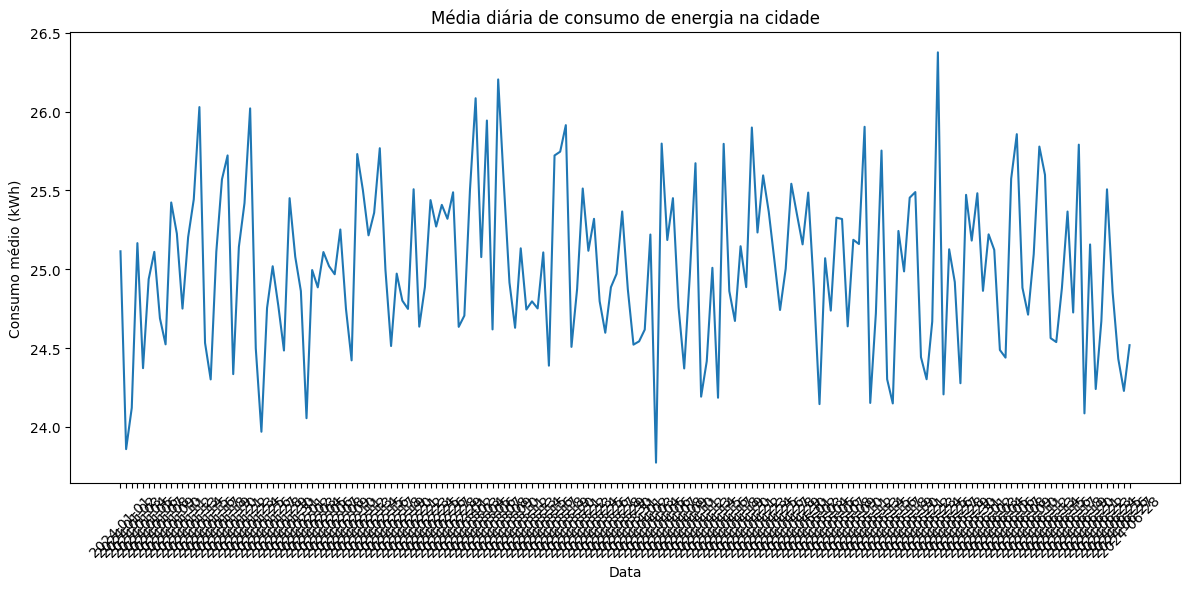

In [23]:
#Crie um gráfico de linha mostrando a média diária de consumo_kwh em toda a cidade ao longo do tempo.
media_diaria = df.groupby("data")["consumo_kwh"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(media_diaria)
plt.title("Média diária de consumo de energia na cidade")
plt.xlabel("Data")
plt.ylabel("Consumo médio (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#Selecione os dados de uma residência aleatória.
residencias = df["id_residencia"].unique()
np.random.seed(42)
residencia_aleatoria = np.random.choice(residencias)
print(f"Residência selecionada: {residencia_aleatoria}")

df_residencia = df[df["id_residencia"] == residencia_aleatoria].copy()

Residência selecionada: 1052


In [28]:
#modele a relação entre data (convertida para dias consecutivos com .astype('int64')) e consumo_kwh com:
df_residencia["data"] = pd.to_datetime(df_residencia["data"])
df_residencia = df_residencia.sort_values("data")
df_residencia["dias"] = (df_residencia["data"] - df_residencia["data"].min()).dt.days

X = df_residencia[["dias"]]
y = df_residencia["consumo_kwh"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(mean_squared_error(y_test, y_pred))

33.58481255693675


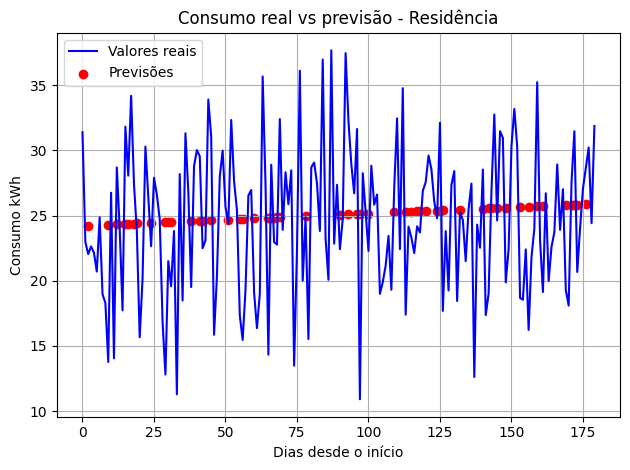

In [32]:
#Gere um gráfico de linha com os valores reais e previstos.
plt.plot(df_residencia["dias"], df_residencia["consumo_kwh"], label="Valores reais", color="blue")
plt.scatter(X_test, y_pred, label="Previsões", color="red")
plt.title("Consumo real vs previsão - Residência")
plt.xlabel("Dias desde o início")
plt.ylabel("Consumo kWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()